# Import Libraries

In [4]:
import numpy as np

# Cell Finder

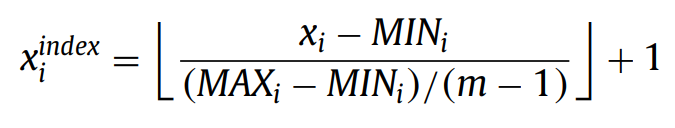

In [5]:
def find_cell_index(i, x_i, data_min, data_max, m):
    """
    Finds the cell index in the CA grid where a data point should be mapped.
    It locates the corresponding cell where a data point fits within the cell range.
    Receives:
        i: Attribute index
        x_i: Field or attribute value
        data_min: Minimum value of all record for each attribute
        data_max: Maximum value of all record for each attribute
        m: Amount of cells in CA (one-row)
    Returns:
        index: An index value that corresponds to the CA cell where the data instance value matches
    """
    numerator = x_i - data_min[i]
    denominator_p1 = data_max[i] - data_min[i]
    denominator_p2 = m - 1
    denominator_c = denominator_p1/denominator_p2 
    index = int(np.floor(numerator / denominator_c))
    # Guardian clip for index values that could exceed the CA boundaries(0 - m - 1)
    return np.clip(index, 0, m-1) 

# Map Data in CA Cells

In [6]:
def map_data_to_CA_cells(data_instance, n_attributes, label, data_min, data_max, CA, m):
    """
    Maps data points to cells in the CA grid, a cell receives a positive count value when the data point matched the cell.
    Receives:
        data_instance: Values of all attributes or features associated with an specific record
        n_attributes: Amount of attributes of each data instance
        label: Class or label assigned to a data instance
        data_min: Minimum value of all records for each attribute
        data_max: Maximum value of all records for each attribute
        m: Amount of cells in CA grid (one-row)
    Returns:
        CA: Updated CA with the frequency or count of real data points that were mapped in each cell
    """
    for i in range(n_attributes):
        index = find_cell_index(i, data_instance[i], data_min, data_max, m)
        CA[label][i][index] += 1
    return CA

Certainly, the cells would have higher temperatures when they are assigned more instances. On the other side a logarithmic scale would prevent the cells to have extreme temperatures due to large number of data instance assignments

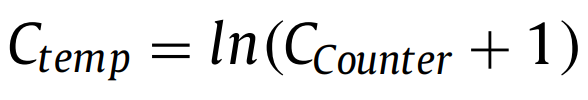

In [7]:
def set_temperature_values(A, n_attributes, m):
    """
    Sets the temperature values in the CA grid.
    Transforms the counts or the frequency into a logarithmic scaled value.
    Receives:
        A: Single CA grid (one-row)
        n_attributes: Amount of attributes of each data instance
        m: Amount of cells in CA grid (one-row)
    Returns:
        A: Updated single CA grid (one-row) with the converted states, counts or frequencies
    """
    for i in range(n_attributes):
        for j in range(m):
            A[i][j] = np.log(A[i][j] + 1)
    return A

# Heat Transfer

In [32]:
# def distribute_heat(A, n_attributes, m, portion, range_param):
#     """
#     Distributes the heat in the CA grid.
#     The different counts are the temperature containg a driving force or heat which is transfered according to some defined rules.
#     In other words, it applies some rules that distribute the cells count values.
#     1. Each cell that has a temperature value emits a heat wave in two directions (left & right)
#     2. Heat waves spread to the neighbor cells until they reach the borders of the area determined by the range parameter
#     3. Cells that received energy, emit a portion of the energy they have received, into the direction of the original wave (only)

#     Receive:
#         A: Single CA grid (one-row)
#         n_attributes: Amount of attributes of each data instance
#         m: Amount of cells in CA grid (one-row)
#         portion: Percentage of heat that will be transfered
#         range_param: Percentage of cells that will be utilized in the heat transfer process.
#     Return:
#         A: Updated single CA grid (one-row) with the heat distributed, in other words the counts reaccomodated
#     """
#     for i in range(n_attributes):
#         new_row = np.zeros(m)
#         for j in range(m):
#             if A[i][j] > 0:
#                 left_index = max(0, j - range_param) # Guardian that avoids grabing an out of boundary left_index (beyond 0)
#                 right_index = min(m - 1, j + range_param) 
#                 new_row[left_index:right_index + 1] += A[i][j] * portion
#                 new_row[j] += A[i][j] * (1 - portion * (right_index - left_index))
#         A[i] = new_row
#     return A

In [521]:
# def distribute_heat(A, n_attributes, m, portion, range_param):
#     """
#     Distributes the heat in the CA grid.
#     The different counts are the temperature containg a driving force or heat which is transfered according to some defined rules.
#     In other words, it applies some rules that distribute the cells count values.
#     1. Each cell that has a temperature value emits a heat wave in two directions (left & right)
#     2. Heat waves spread to the neighbor cells until they reach the borders of the area determined by the range parameter (percentage of cells that will be utilized in the heat transfer process)
#     3. Cells that received energy, emit a portion of the energy they have received, into the direction of the original wave (only)
#     4. A cell is not supposed to emit more than one heat wave, it can only emit it one

#     Receive:
#         A: Single CA grid (one-row)
#         n_attributes: Amount of attributes of each data instance
#         m: Amount of cells in CA grid (one-row)
#         portion: Percentage of heat that will be transfered
#         range_param: Percentage of cells that will be utilized in the heat transfer process.
#     Return:
#         A: Updated single CA grid (one-row) with the heat distributed, in other words the counts reaccomodated
#     """
#     for attribute_index in range(n_attributes):
#         index_lst = [[0, 0, 0] for _ in range(m)]
#         new_row = [0] * m
#         for index in range(m):
#             if A[attribute_index][index] != 0:
#                 if index == 0:
#                     index_lst[index][0] = 1
#                     index_lst[index + range_param][2] = 1
#                     new_row[1] += A[attribute_index][index] * portion
#                     new_row[0] += A[attribute_index][index] * (1 - portion) 
#                 elif index == m - 1:
#                     index_lst[index][0] = 1
#                     index_lst[index - range_param][1] = 1
#                     new_row[m - 2] += A[attribute_index][index] * portion
#                     new_row[m - 1] += A[attribute_index][m - 1] * (1 - portion)
#                 else:
#                     index_lst[index][0] = 1
#                     index_lst[index + range_param][2] = 1
#                     index_lst[index - range_param][1] = 1
#                     left_index = index - range_param
#                     right_index = index + range_param
#                     new_row[left_index] += A[attribute_index][index] * portion/2
#                     new_row[right_index] += A[attribute_index][index] * portion/2
#                     new_row[index] += A[attribute_index][index] * (1 - portion)
#         new_row_2 = [0] * m
#         for index in range(len(index_lst)):
#             if index_lst[index][0] == 0:
#                 if index != 0 and index != m - 1:
#                     if index_lst[index][1] and index_lst[index][2]:
#                         index_lst[index][0] = 1
#                         index_lst[index - range_param][1] = 1
#                         index_lst[index + range_param][2] = 1
#                         left_index = index - range_param
#                         right_index = index + range_param
#                         if new_row[left_index] != 0 and new_row[right_index] != 0:
#                             new_row_2[left_index] = new_row[left_index] + new_row[index] * portion/2
#                             new_row_2[right_index] = new_row[right_index] + new_row[index] * portion/2
#                             new_row_2[index] = new_row[index] * (1 - portion)
#                         elif new_row[left_index] != 0:
#                             new_row_2[left_index] = new_row[left_index] + new_row[index] * portion/2
#                             new_row_2[right_index] = new_row[right_index] * portion/2
#                             new_row_2[index] = new_row[index] * (1 - portion)
#                         elif new_row[right_index] != 0:
#                             new_row_2[left_index] = new_row[index] * portion/2
#                             new_row_2[right_index] = new_row[right_index] + new_row[index] * portion/2
#                             new_row_2[index] = new_row[index] * (1 - portion)                    
#                         else:
#                             new_row_2[left_index] = new_row[index] * portion/2
#                             new_row_2[right_index] = new_row[index] * portion/2
#                             new_row_2[index] = new_row[index] * (1 - portion)                    
#                     elif index_lst[index][1]:
#                         index_lst[index][0] = 1
#                         index_lst[index - range_param][1] = 1                
#                         left_index = index - range_param
#                         if new_row[left_index] != 0:
#                             new_row_2[left_index] = new_row[index] + new_row[index] * portion
#                             new_row_2[index] = new_row[index] * (1 - portion)   
#                         else:
#                             new_row_2[left_index] = new_row[index] * portion
#                             new_row_2[index] = new_row[index] * (1 - portion)                
#                     elif index_lst[index][2]:
#                         index_lst[index][0] = 1
#                         index_lst[index + range_param][2] = 1                
#                         right_index = index + range_param                
#                         if new_row[right_index] != 0:
#                             new_row_2[right_index] = new_row[index] + new_row[index] * portion
#                             new_row_2[index] = new_row[index] * (1 - portion)
#                         else:
#                             new_row_2[right_index] = new_row[index] * portion
#                             new_row_2[index] = new_row[index] * (1 - portion)
#             else:
#                 if new_row_2[index] == 0:
#                     new_row_2[index] = new_row[index]
#         A[attribute_index] = new_row_2
#     return A

In [522]:
# def distribute_heat(A, n_attributes, m, portion, range_percentage):
#     def transfer_heat(A, n_attributes, m, portion, range_percentage):
#         index_dict = {}
#         for i in range(n_attributes):
#             new_row = np.zeros(m)
#             oside_neighborhood = int(m*range_percentage)
#             ind_portion = portion/(2*oside_neighborhood)
#             index_lst = [[0, 0, 0] for _ in range(m)]
#             for j in range(m):
#                 if A[i][j] > 0:
#                     if j - oside_neighborhood < 0:
#                         left_index = max(0, j - oside_neighborhood)
#                         right_index = min(m - 1, j + oside_neighborhood)
#                         ind_portion_adj = portion/(2*oside_neighborhood - abs(j - oside_neighborhood))
#                         new_row[j + 1:right_index + 1] += A[i][j] * ind_portion_adj
#                         new_row[left_index:j] += A[i][j] * ind_portion_adj
#                         new_row[j] += A[i][j] * (1-portion)
#                         index_lst[j][0] = 1
#                         for sublst in index_lst[j + 1:right_index + 1]:
#                             sublst[1] = 1
#                         for sublst in index_lst[left_index:j]:
#                             sublst[2] = 1
#                     elif j + oside_neighborhood > m - 1:
#                         left_index = max(0, j - oside_neighborhood)
#                         right_index = min(m - 1, j + oside_neighborhood)
#                         ind_portion_adj = portion/(2*oside_neighborhood - abs(m - 1 - (j + oside_neighborhood)))
#                         new_row[j + 1:right_index + 1] += A[i][j] * ind_portion_adj
#                         new_row[left_index:j] += A[i][j] * ind_portion_adj
#                         new_row[j] += A[i][j] * (1-portion)
#                         index_lst[j][0] = 1
#                         for sublst in index_lst[j + 1:right_index + 1]:
#                             sublst[1] = 1
#                         for sublst in index_lst[left_index:j]:
#                             sublst[2] = 1
#                     elif j == 0:
#                         right_index = min(m - 1, j + oside_neighborhood)
#                         ind_portion_adj = portion/oside_neighborhood
#                         new_row[1:right_index + 1] += A[i][j] * ind_portion_adj
#                         new_row[j] += A[i][j] * (1 - portion)
#                         index_lst[j][0] = 1
#                         for sublst in index_lst[1:right_index + 1]:
#                             sublst[1] = 1
#                     elif j == m - 1:
#                         left_index = max(0, j - oside_neighborhood)
#                         ind_portion_adj = portion/oside_neighborhood
#                         new_row[left_index:m - 1] += A[i][j] * ind_portion_adj
#                         new_row[j] += A[i][j] * (1 - portion)
#                         index_lst[j][0] = 1
#                         for sublst in index_lst[left_index:m - 1]:
#                             sublst[2] = 1
#                     else:
#                         left_index = max(0, j - oside_neighborhood)
#                         right_index = min(m - 1, j + oside_neighborhood)
#                         new_row[j + 1:right_index + 1] += A[i][j] * ind_portion
#                         new_row[left_index:j] += A[i][j] * ind_portion
#                         new_row[j] += A[i][j] * (1-portion)
#                         index_lst[j][0] = 1
#                         for sublst in index_lst[j + 1:right_index + 1]:
#                             sublst[1] = 1
#                         for sublst in index_lst[left_index:j]:
#                             sublst[2] = 1
#             index_dict[i] = index_lst        
#             A[i] = new_row
#         return A, index_dict
#     def expand_heat(A, n_attributes, m, portion, range_percentage, index_dict):
#         updated_index_dict = {}
#         for i in range(n_attributes):
#             new_row = np.zeros(m)
#             oside_neighborhood = int(m*range_percentage)
#             ind_portion = portion/(2*oside_neighborhood)
#             index_lst = index_dict[i].copy()
#             skipped = []
#             for j in range(m):
#                 if j != 0 and j != m - 1:
#                     if index_dict[i][j][0] == 0: 
#                         if index_dict[i][j][1] == 1 and index_dict[i][j][2] == 0:
#                             if j + oside_neighborhood > m - 1:
#                                 right_index = min(m - 1, j + oside_neighborhood)
#                                 ind_portion_adj = portion/(oside_neighborhood - abs(m - 1 - (j + oside_neighborhood)))
#                                 new_row[j + 1:right_index + 1] += A[i][j + 1:right_index + 1] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[j + 1:right_index + 1]:
#                                     sublst[1] = 1
#                             else:
#                                 right_index = j + oside_neighborhood
#                                 ind_portion_adj = portion/oside_neighborhood
#                                 new_row[j + 1:right_index + 1] += A[i][j + 1:right_index + 1] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[j + 1:right_index + 1]:
#                                     sublst[1] = 1
#                         elif index_dict[i][j][1] == 0 and index_dict[i][j][2] == 1:
#                             if j - oside_neighborhood < 0:
#                                 left_index = max(0, j - oside_neighborhood)
#                                 ind_portion_adj = portion/(oside_neighborhood - abs(j - oside_neighborhood))
#                                 new_row[left_index:j] += A[i][left_index:j] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[left_index:j]:
#                                     sublst[2] = 1
#                             else:
#                                 left_index = j - oside_neighborhood
#                                 ind_portion_adj = portion/oside_neighborhood
#                                 new_row[left_index:j] += A[i][left_index:j] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[left_index:j]:
#                                     sublst[2] = 1
#                         elif index_dict[i][j][1] == 1 and index_dict[i][j][2] == 1:
#                             if j + oside_neighborhood > m - 1:
#                                 left_index = max(0, j - oside_neighborhood)
#                                 right_index = min(m - 1, j + oside_neighborhood)
#                                 ind_portion_adj = portion/(2*oside_neighborhood - abs(m - 1 - (j + oside_neighborhood)))
#                                 new_row[j + 1:right_index + 1] += A[i][j + 1:right_index + 1] + A[i][j] * ind_portion_adj
#                                 new_row[left_index:j] += A[i][left_index:j] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[j + 1:right_index + 1]:
#                                     sublst[1] = 1
#                                 for sublst in index_lst[left_index:j]:
#                                     sublst[2] = 1
#                             if j - oside_neighborhood < 0:
#                                 left_index = max(0, j - oside_neighborhood)
#                                 right_index = min(m - 1, j + oside_neighborhood)
#                                 ind_portion_adj = portion/(2*oside_neighborhood - abs(j - oside_neighborhood))
#                                 new_row[j + 1:right_index + 1] += A[i][j + 1:right_index + 1] + A[i][j] * ind_portion_adj
#                                 new_row[left_index:j] += A[i][left_index:j] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[j + 1:right_index + 1]:
#                                     sublst[1] = 1
#                                 for sublst in index_lst[left_index:j]:
#                                     sublst[2] = 1
#                             else:
#                                 left_index = j - oside_neighborhood
#                                 right_index = j + oside_neighborhood
#                                 ind_portion_adj = portion/(2*oside_neighborhood)
#                                 new_row[j + 1:right_index + 1] += A[i][j + 1:right_index + 1] + A[i][j] * ind_portion_adj
#                                 new_row[left_index:j] += A[i][left_index:j] + A[i][j] * ind_portion_adj
#                                 new_row[j] += A[i][j] * (1-portion)
#                                 index_lst[j][0] = 1
#                                 for sublst in index_lst[j + 1:right_index + 1]:
#                                     sublst[1] = 1
#                                 for sublst in index_lst[left_index:j]:
#                                     sublst[2] = 1
#                     if index_dict[i][j][1] == 0 and index_dict[i][j][2] == 0:
#                         skipped.append(j)
#             for skip in skipped:
#                 if index_lst[skip][1] == 0 and index_lst[skip][2] == 0:
#                     new_row[skip] += A[i][skip]
#             index_dict[i] = index_lst        
#             A[i] = new_row
#         return A, index_dict
        
#     A, index_dict = transfer_heat(A, n_attributes, m, portion, range_percentage)
#     distribute_flag = True
#     while distribute_flag:
#         distribute_flag = False  # Reset the flag
#         for i in range(n_attributes):
#             if any([sublst[0] == 0 for j, sublst in enumerate(index_dict[i]) if 0 < j < m-1]):
#                 distribute_flag = True  # Set the flag if we find any 0
#                 break
#         if distribute_flag:
#             A, index_dict = expand_heat(A, n_attributes, m, portion, range_percentage, index_dict)
#     A_list = [arr.tolist() for arr in A]
#     return A_list

In [34]:
def distribute_heat(A, n_attributes, m, portion, range_param):
    range_cells = int(m * range_param)  # Calculate the number of cells based on the percentage
    for attr in range(n_attributes):
        new_row = np.zeros(m)
        for cell in range(m):
            if A[attr][cell] > 0:
                left_index = max(0, cell - range_cells)
                right_index = min(m - 1, cell + range_cells)
                # Distribute heat to the left and right neighbors
                total_cells = right_index - left_index  # Exclude the original cell
                heat_per_cell = A[attr][cell] * portion / total_cells
                new_row[left_index:right_index + 1] += heat_per_cell
                new_row[cell] += A[attr][cell] - heat_per_cell * (total_cells + 1)  # Subtract the distributed heat 
        A[attr] = new_row
    A_list = [arr.tolist() for arr in A]
    return A_list

In [8]:
# def distribute_heat(A, n_attributes, m, portion, range_param, seed=None):
#     # np.random.seed(seed)  # Optional: for reproducible results
#     # range_cells = int(m * range_param)
#     # result = np.zeros_like(A, dtype=np.float64)

#     # for attr in range(n_attributes):
#     #     for cell in range(m):
#     #         left_index = max(0, cell - range_cells)
#     #         right_index = min(m, cell + range_cells + 1)
#     #         distribution_range = right_index - left_index
            
#     #         if distribution_range > 0:
#     #             # Generate random distribution factors for the range
#     #             random_factors = np.random.rand(distribution_range)
#     #             random_factors /= random_factors.sum()  # Normalize to sum to 1
                
#     #             heat_to_distribute = A[attr, cell] * portion
#     #             distributed_heat = random_factors * heat_to_distribute
                
#     #             # Apply the distributed heat
#     #             result[attr, left_index:right_index] += distributed_heat
                
#     #             # Adjust the original cell's heat
#     #             result[attr, cell] += A[attr, cell] * (1 - portion)
#     return A

In [525]:
# def distribute_heat(A, n_attributes, m, portion, range_param):
#     range_cells = int(m * range_param)  # Calculate the number of cells based on the percentage
#     result = np.zeros_like(A, dtype=np.float64)  # Initialize the result array with zeros and float64 type
    
#     for attr in range(n_attributes):
#         for offset in range(-range_cells, range_cells + 1):
#             weight = portion / (2 * range_cells + 1)
#             if offset < 0:
#                 result[attr, :offset] += weight * A[attr, -offset:].astype(np.float64)
#             elif offset > 0:
#                 result[attr, offset:] += weight * A[attr, :-offset].astype(np.float64)
#             else:
#                 result[attr] += (1 - portion) * A[attr].astype(np.float64)
    
#     np.clip(result, 0, np.max(A), out=result)
    
#     return result

In [35]:
A = [[0, 0, 100, 0, 100, 0, 0]]
# A = [[0, 0, 100, 0, 0], [0, 0, 100, 0, 0]]
m = 7
# m = 5
portion = 0.2
range_percentage = 0.2
n_attributes = 1
A = np.array(A)
A = distribute_heat(A, n_attributes, m, portion, range_percentage)
print(A)

[[0, 10, 80, 20, 80, 10, 0]]


In [42]:
A = [[0, 0, 100, 0, 0], [0, 0, 100, 0, 0]]
m = 5
portion = 0.2
range_percentage = 0.2
n_attributes = 2
A = np.array(A)
A = distribute_heat(A, n_attributes, m, portion, range_percentage)
print(A)

[[0, 10, 80, 10, 0], [0, 10, 80, 10, 0]]


In [45]:
def initialize_CA(n_classes, n_attributes, m):
    """Initialize the Cellular Automata grid."""
    return np.zeros((n_classes, n_attributes, m))

In [46]:
def classify(data_instance, data_min, data_max, CA, n_classes, n_attributes, m):
    """Classify a data point based on the heat values in the CA grid."""
    max_heat = -np.inf
    class_label = -1
    for i in range(n_classes):
        total_heat = 0
        for j in range(n_attributes):
            index = find_cell_index(j, data_instance[j], data_min, data_max, m)
            total_heat += CA[i][j][index]
        if total_heat > max_heat:
            max_heat = total_heat
            class_label = i
    return class_label

In [47]:
def train_CA(X_train, y_train, data_min, data_max, CA, n_classes, n_attributes, m, portion, range_param):
    """Train the Cellular Automata with the training data."""
    for data_instance, label in zip(X_train, y_train):
        CA = map_data_to_CA_cells(data_instance, n_attributes, label, data_min, data_max, CA, m)
    for i in range(n_classes):
        CA[i] = set_temperature_values(CA[i], n_attributes, m)
        CA[i] = distribute_heat(np.array(CA[i]), n_attributes, m, portion, range_param)
    return CA

In [48]:
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn
import pandas

`iris.keys()` = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

`iris_data['feature_names']` = 
[
'sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'
 ]

`iris_data['target_names']` = array(['setosa', 'versicolor', 'virginica'], dtype='<U10')


In [49]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
iris_df = pandas.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_df['iris type'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df['iris name'] = iris_df['iris type'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type,iris name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris type          150 non-null    int32  
 5   iris name          150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
iris_df.groupby(['iris name']).describe()

sepal length (cm)                                               
                       count   mean       std  min    25%  50%  75%  max   
iris name                                                                  
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  \
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      iris type        
                      count   mean  ...              75%  max     count mean   
iris name                           ...                                        
setosa                 50.0  3.428  ...              0.3  0.6      50.0  0.0  \
versicolor             50.0  2.770  ...              1.5  1.8      50.0  1.0   
virginica              50.0  2.974  ...              2.3  2.5      50.0  2.0   

                                          
            std  min  25%  50%  75%  max  
iris name                                 
setosa      0.0  0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  1.0  1.0  1.0  1.0  1.0  
virginica   0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

In [104]:
# Parameters
n_classes = 3
n_attributes = 4
m = 72 # Number of cells in each row
portion = 0.5 # Portion of heat to distribute
range_param = 0.2 # Range parameter for heat distribution

# Machine Learning Process

In [105]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Get data min and max for CA
data_min = np.min(X_train, axis=0)
data_max = np.max(X_train, axis=0)

# Train the Cellular Automata classifier
CA = initialize_CA(n_classes, n_attributes, m)
CA = train_CA(X_train, y_train, data_min, data_max, CA, n_classes, n_attributes, m, portion, range_param)

# Classify the test data using the CA classifier
CA_predictions = [classify(instance, data_min, data_max, CA, n_classes, n_attributes, m) for instance in X_test]

# Train other classifiers
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train, y_train)

# Get predictions from other classifiers
lr_predictions = logistic_regressor.predict(X_test)
rf_predictions = random_forest.predict(X_test)
kn_predictions = k_neighbors.predict(X_test)

# Calculate accuracies
CA_accuracy = accuracy_score(y_test, CA_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
kn_accuracy = accuracy_score(y_test, kn_predictions)

# Print accuracies
print("Cellular Automata Classifier Accuracy: ", CA_accuracy)
print("Logistic Regression Classifier Accuracy: ", lr_accuracy)
print("Random Forest Classifier Accuracy: ", rf_accuracy)
print("K-Neighbors Classifier Accuracy: ", kn_accuracy)

Cellular Automata Classifier Accuracy:  0.9333333333333333
Logistic Regression Classifier Accuracy:  0.9111111111111111
Random Forest Classifier Accuracy:  1.0
K-Neighbors Classifier Accuracy:  1.0


In [96]:
def distribute_heat(A, n_attributes, m, portion, range_param):
    range_cells = int(m * range_param)  # Calculate the number of cells based on the percentage
    for attr in range(n_attributes):
        new_row = np.zeros(m)
        for cell in range(m):
            if A[attr][cell] > 0:
                left_index = max(0, cell - range_cells)
                right_index = min(m - 1, cell + range_cells)
                # Distribute heat to the left and right neighbors
                total_cells = right_index - left_index  # Exclude the original cell
                heat_per_cell = A[attr][cell] * portion / total_cells
                new_row[left_index:right_index + 1] += heat_per_cell
                new_row[cell] += A[attr][cell] - heat_per_cell * (total_cells + 1)  # Subtract the distributed heat 
        A[attr] = new_row
    A_list = [arr.tolist() for arr in A]
    return A_list

In [92]:
def distribute_heat(A, n_attributes, m, portion, range_param):
    range_cells = int(m * range_param)  # Calculate the number of cells based on the percentage
    for attr in range(n_attributes):
        new_row = np.zeros(m)
        for cell in range(m):
            if A[attr][cell] > 0:
                left_index = max(0, cell - range_cells)
                right_index = min(m - 1, cell + range_cells)
                # Distribute heat to the left and right neighbors
                total_cells = right_index - left_index  # Exclude the original cell
                heat_per_cell = A[attr][cell] * portion / total_cells
                new_row[left_index:right_index + 1] += heat_per_cell
                new_row[cell] += A[attr][cell] - heat_per_cell * (total_cells + 1)  # Subtract the distributed heat 
        A[attr] = new_row
    A_list = [arr.tolist() for arr in A]
    return A

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd  # Import pandas for easy table manipulation and display
from sklearn.svm import SVC  # Support Vector Classifier for SVM
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron Classifier

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Get data min and max for CA
data_min = np.min(X_train, axis=0)
data_max = np.max(X_train, axis=0)

# Train the Cellular Automata classifier
CA = initialize_CA(n_classes, n_attributes, m)
CA = train_CA(X_train, y_train, data_min, data_max, CA, n_classes, n_attributes, m, portion, range_param)

# Classify the test data using the CA classifier
CA_predictions = [classify(instance, data_min, data_max, CA, n_classes, n_attributes, m) for instance in X_test]

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train the MLP classifier
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(X_train, y_train)

# Get predictions from SVM and MLP classifiers
svm_predictions = svm_classifier.predict(X_test)
mlp_predictions = mlp_classifier.predict(X_test)

# Calculate accuracies for SVM and MLP
svm_accuracy = accuracy_score(y_test, svm_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

# Print all accuracies
print("Cellular Automata Classifier Accuracy: ", CA_accuracy)
print("Logistic Regression Classifier Accuracy: ", lr_accuracy)
print("Random Forest Classifier Accuracy: ", rf_accuracy)
print("K-Neighbors Classifier Accuracy: ", kn_accuracy)
print("Support Vector Machine Classifier Accuracy: ", svm_accuracy)
print("Multi-Layer Perceptron Classifier Accuracy: ", mlp_accuracy)

# Function to evaluate classifier
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    runtime = end_time - start_time
    success_rate = accuracy * 100  # Assuming success rate is the accuracy percentage

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Runtime': runtime,
        'Success (%)': success_rate
    }

# Initialize classifiers
classifiers = {
    'CA': initialize_CA(n_classes, n_attributes, m),  # This would be your custom function
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLPC': MLPClassifier(max_iter=1000)
}

# Dictionary to hold evaluation results
results = {}

# Evaluate each classifier
for name, clf in classifiers.items():
    if name == 'CA':  # Custom handling for CA since it doesn't follow the scikit-learn interface
        start_time = time.time()
        CA = train_CA(X_train, y_train, data_min, data_max, clf, n_classes, n_attributes, m, portion, range_param)
        CA_predictions = [classify(instance, data_min, data_max, CA, n_classes, n_attributes, m) for instance in X_test]
        end_time = time.time()

        accuracy = accuracy_score(y_test, CA_predictions)
        precision = precision_score(y_test, CA_predictions, average='macro')
        recall = recall_score(y_test, CA_predictions, average='macro')
        f1 = f1_score(y_test, CA_predictions, average='macro')
        runtime = end_time - start_time
        success_rate = accuracy * 100

        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Runtime': runtime,
            'Success (%)': success_rate
        }
    else:
        results[name] = evaluate_classifier(clf, X_train, y_train, X_test, y_test)

# Create a DataFrame from the results
results_df = pd.DataFrame(results).T  # Transpose to have classifiers as rows

# Display the comparison table
print(results_df)

Cellular Automata Classifier Accuracy:  0.9777777777777777
Logistic Regression Classifier Accuracy:  0.9111111111111111
Random Forest Classifier Accuracy:  1.0
K-Neighbors Classifier Accuracy:  1.0
Support Vector Machine Classifier Accuracy:  1.0
Multi-Layer Perceptron Classifier Accuracy:  0.9777777777777777


KeyboardInterrupt: 